<a href="https://colab.research.google.com/github/PaulinaTarkowsk/sql_recap/blob/main/kaggle_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
from google.colab import drive

## Zbiory danych kaggle

W tym zeszycie będziemy omawiać zestawienie zbiorów danych dostępnych na platformie kaggle.

Dane zostały udostępnione na podstawie licencji CC0 na [tej stronie kaggle](https://www.kaggle.com/canggih/voted-kaggle-dataset) i wstępnie przez nas przygotowane.

Zapoznajmy się z materiałem dostępnym w notebooku i na podstawie instrukcji przygotujmy dane, które będą potrzebne podczas zajęć.

**Uwaga.** Wracając do dokumentu, pamiętaj o ponownym wywołaniu komórek z kodem.

### Zawartość zbioru danych

W zbiorze znajdują się informacje o:

*   **Title** - nazwie zbioru danych,
*   **Data Type** - formie, w jakiej zbiór został udostępniony,
*   **Licence** - licencji na podstawie, której dopuszczone jest korzystanie ze zbioru,
*   **Votes** - liczbie głosów oddanych na zbiór,
*   **Views** - liczbie wyświetleń zbioru,
*   **Downloads** - liczbie pobrań zbioru,
*   **Kernels** - liczbie materiałów stworzonych w oparciu o zbiór,
*   **Topics** - liczbie tematów.







Potrzebne nam dane zostały udostępnione wraz z dokumentem - poniższy kod importuje plik.

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
kaggle = pd.read_csv('/content/drive/My Drive/Vis/Kaggle Datasets/kaggle-ds.csv')
kaggle

,Title,Data Type,License,Votes,Views,Downloads,Kernels,Topics
0,Credit Card Fraud Detection,CSV,ODbL,1241,442136.0,53128.0,1782.0,26.0
1,European Soccer Database,SQLite,ODbL,1046,396214.0,46367.0,1459.0,75.0
2,TMDB 5000 Movie Dataset,CSV,Other,1024,446255.0,62002.0,1394.0,46.0
3,Global Terrorism Database,CSV,Other,789,187877.0,26309.0,608.0,11.0
4,Bitcoin Historical Data,CSV,CC4,618,146734.0,16868.0,68.0,13.0
...,...,...,...,...,...,...,...,...
2145,Fortnite: Battle Royale Chest Location Coordin...,CSV,Other,2,369.0,16.0,NaN,0.0
2146,Titanic: Passenger Nationalities,CSV,Other,2,75.0,10.0,NaN,0.0
2147,Stemmed and Lementized English words,{}JSON,ODbL,2,70.0,11.0,NaN,0.0
2148,Los Angeles Weather During 2014,CSV,CC0,2,78.0,5.0,NaN,0.0


## Przygotowanie zeszytu

Na początku chcemy upewnić się, że dane zostały poprawnie rozpoznane i dokonać potrzebnych konwersji.

Na podstawie podglądu danych powyżej spodziewamy się, że pierwsza kolumna zawiera informacje tekstowe pozwalające na odróżnienie poszczególnych zbiorów danych. W przypadku kolumn **Data Type** i **Licence** spodziewamy się, że przechowują w postaci tekstowej informacje o kategoriach.

Pozostałe kolumny zakładamy, że są kolumnami numerycznymi. Sprawdźmy jak faktycznie wyglądają dane w zestawie.

### Sprawdzenie typów danych

Poniżej potrzebujemy wykonać dołączone instrukcje, aby otrzymać ramki danych wykorzystywane na zajęciach.

Na początek sprawdźmy, jak zostały rozpoznane dane podczas importu.

In [6]:
kaggle.dtypes

Title         object
Data Type     object
License       object
Votes          int64
Views        float64
Downloads    float64
Kernels      float64
Topics       float64
dtype: object

Określmy, czy w danych znajdują się rekordy, dla których brakuje informacji w którejkolwiek z kolumn.

In [7]:
"complete records: " + str(len(kaggle.dropna(how="any"))) + "; total records: " + str(len(kaggle))

'complete records: 845; total records: 2150'

## Konwersja typów zbiorów danych

Przyjrzyjmy się informacjom dotyczącym typów zbiorów danych w kolumnie **Data Type**.

In [8]:
kaggle["Data Type"].value_counts()

Data Type
CSV         1593
Other        468
{}JSON        56
SQLite        25
BigQuery       8
Name: count, dtype: int64

W tym przypadku jedynie rozpoznamy typ danych jako kategoryczny.

In [9]:
kaggle["Data Type"] = kaggle["Data Type"].astype("category")

### Konwersja licencji do kategorii

W następnej kolejności spójrzmy, jakie typy licencji występują w kolumnie **Licence**.

In [10]:
kaggle["License"].value_counts()

License
CC0      845
Other    751
CC4      324
ODbL     181
GPL       26
CC3       23
Name: count, dtype: int64

Tu również wystarczy nam, jeśli dane zostaną rozpozane jako kategoria.

In [11]:
kaggle["License"] = kaggle["License"].astype("category")

### Analiza zmiennych numerycznych

Poświęćmy jeszcze chwilę na przegląd podstawowych statystyk dla zmiennych numerycznych.

In [12]:
kaggle.describe()

,Votes,Views,Downloads,Kernels,Topics
count,2150.000000,2145.000000,2135.000000,1206.000000,1558.000000
mean,24.011628,7299.300699,923.793443,38.392206,1.261874
std,64.788465,22660.139843,3098.584600,147.499168,3.589140
min,2.000000,29.000000,0.000000,2.000000,0.000000
25%,4.000000,750.000000,60.000000,3.000000,0.000000
50%,8.000000,1930.000000,187.000000,7.000000,0.000000
75%,19.000000,5151.000000,602.000000,21.000000,2.000000
max,1241.000000,446255.000000,62002.000000,3394.000000,75.000000


Zauważmy, że we wszystkich przypadkach obserwujemy wielokrotnie wyższe wartości maksymalne od wartości średnich, jednocześnie w przypadku wszystkich statystyk z wyjątkiem **Topics** odchylenie standardowe wielokrotnie przekracza wielkość średniej.

Spodziewamy się, że w tym zestawieniu znajdują się zbiory znacząco odstające od większości rekordów.

## Zadania

In [13]:
import seaborn as sns

sns.set_theme()
sns.set_style("dark")
sns.set_context("talk")

palette = sns.color_palette(palette="husl",
	  n_colors=5,
	  desat=0.2,
	  as_cmap=False
	  )
sns.set_palette(palette)

<Axes: xlabel='Topics', ylabel='Kernels'>

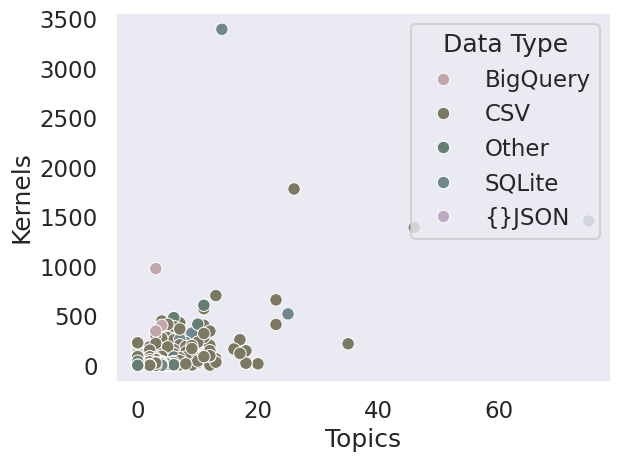

In [14]:
sns.scatterplot(data=kaggle, x='Topics', y='Kernels', hue='Data Type')

<Axes: xlabel='Votes', ylabel='Downloads'>

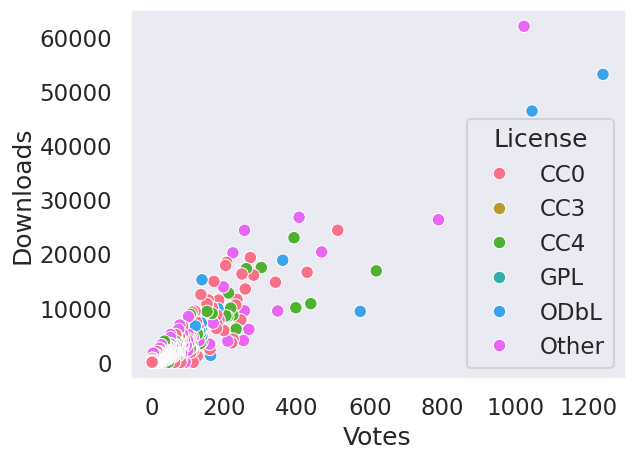

In [15]:
sns.scatterplot(data=kaggle, x='Votes', y='Downloads', hue='License')

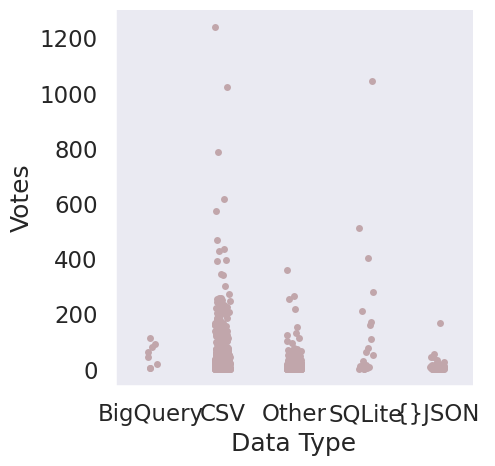

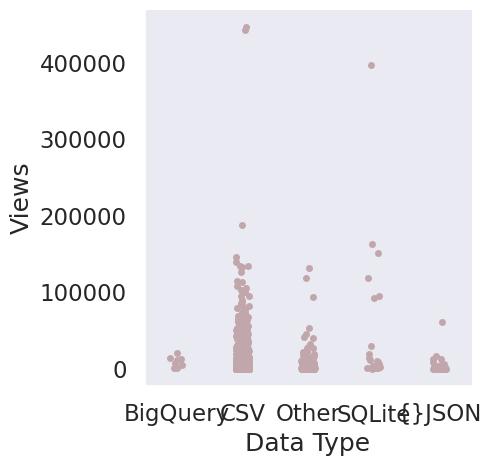

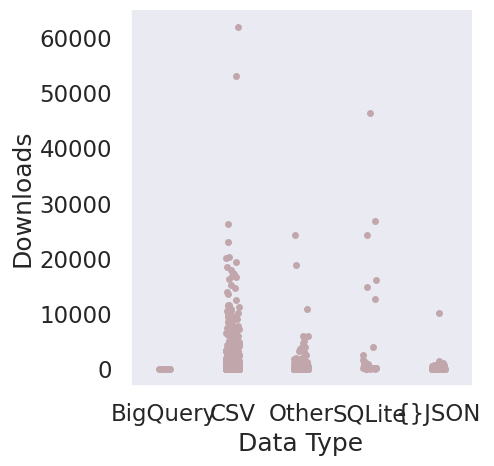

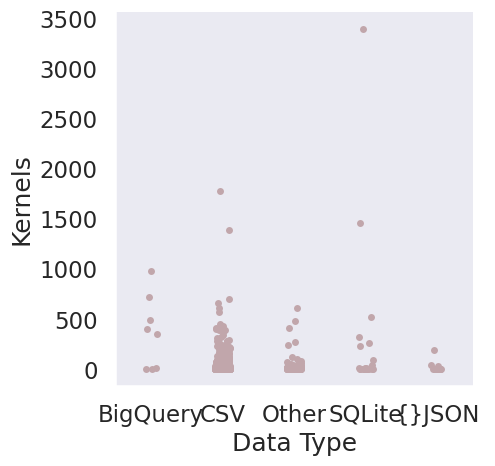

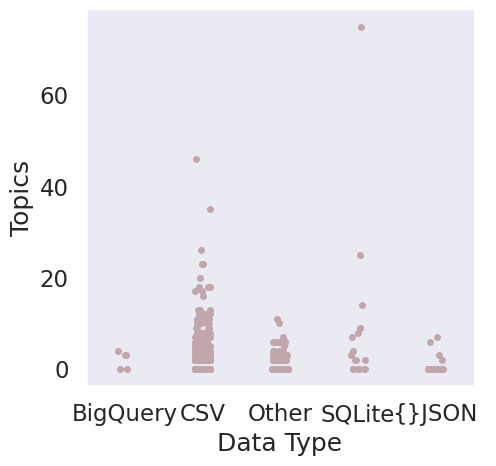

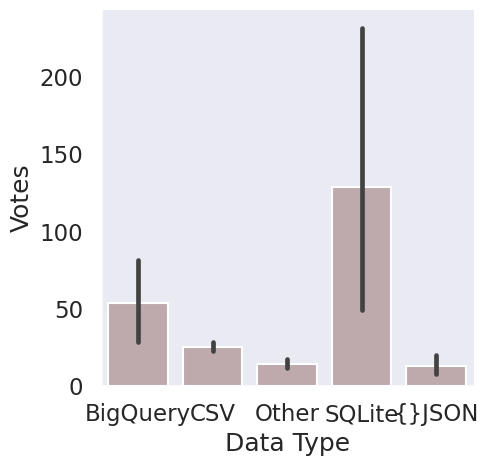

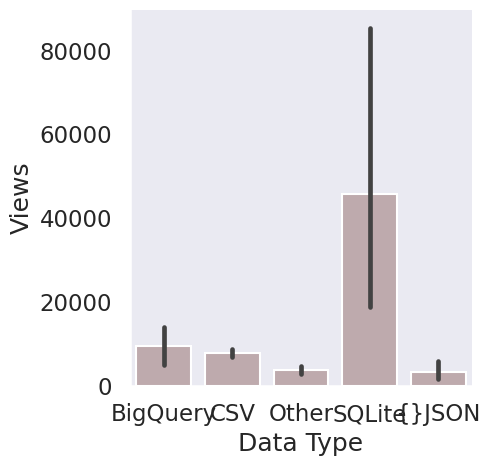

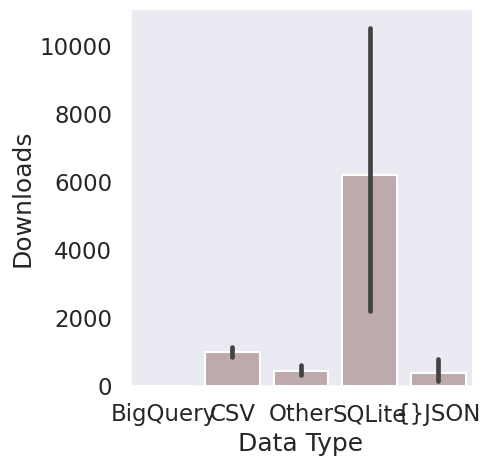

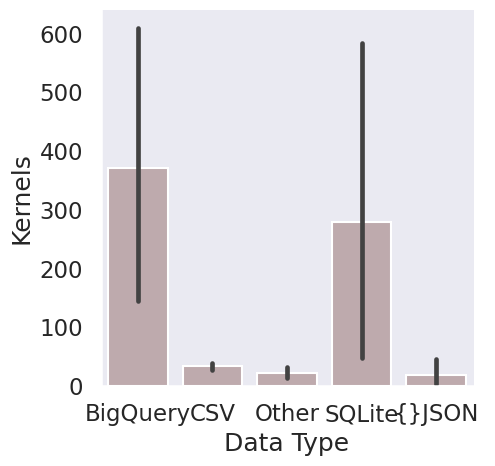

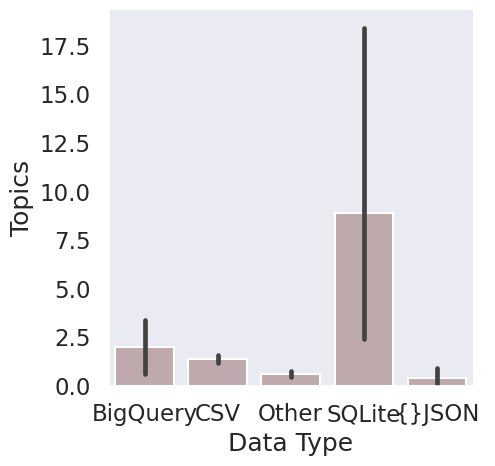

In [16]:
plot_catplot = ['Votes','Views','Downloads','Kernels','Topics']

for plot in plot_catplot:
    sns.catplot(data=kaggle,
    x="Data Type",
    y= plot,
    );

for plot in plot_catplot:
    sns.catplot(data=kaggle,
    x="Data Type",
    y= plot,
    kind="bar"

    );

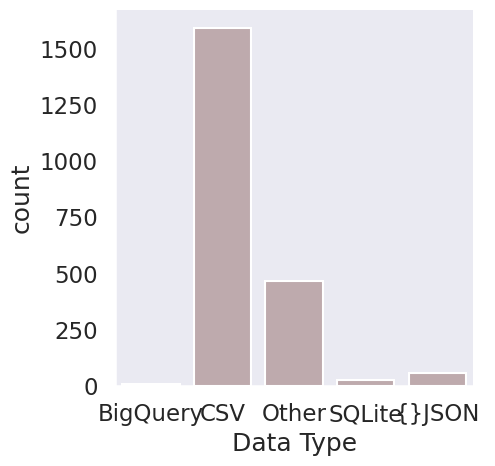

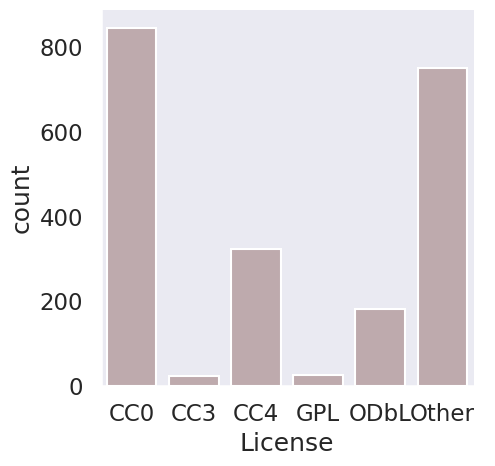

In [17]:
sns.catplot(data=kaggle,
  x="Data Type",
  kind="count"
  );

sns.catplot(data=kaggle,
  x="License",
  kind="count"
  );

In [18]:
import plotly.express as px

przejdź do sekcji zadania i stwórz wykres punktowy plotly, który zobrazuje relację między liczbą pobrań, liczbą wyświetleń i liczbą głosów oddanych na dany zbiór. Tą ostatnią zmienną wykorzystaj do przypisania wielkości punktom wykresu, przy czym maksymalna wielkość punktu powinna wynosić 50. Wykorzystaj kolor, by poinformować odbiorcę o tym, na jakiej licencji udostępniono konkretny zbiór.

In [20]:
fig = px.scatter(data_frame=kaggle,
	x="Downloads",
	y="Views",
	color="License",
	#hover_name="Country",
	size="Votes",
	size_max=50,
	title="""Statystyki kaggle""")
fig.show()

przejdź do sekcji zadania i stwórz wykres punktowy plotly, który zobrazuje relację między liczbą wyświetleń i liczbą tematów otwartych dla danego zbioru. Liczbę głosów wykorzystaj do przypisania wielkości punktom wykresu, przy czym maksymalna wielkość punktu powinna wynosić 40. Wykorzystaj kolor i podpowiedź, by poinformować odbiorcę o typie danych konkretnego zbioru.

In [24]:
fig = px.scatter(data_frame=kaggle,
	x="Views",
	y="Topics",
	color="Data Type",
	hover_name="Data Type",
	size="Votes",
	size_max=40,
	title="""Statystyki kaggle""")
fig.show()